# 01. Regression

- **회귀 분석**: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- **회귀**: 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭

독립변수: 피처 // 종속변수: 결정 값

**핵심: 주어진 피처와 결정 값 데이터를 기반으로 학습으로 통해 최적의 _회귀 계수_ 를 찾아내는 것**

# 02. Simple linear regression

# 03. Minimizing costs - Gradient Descent

- _**반복적인 계산**_ 을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식

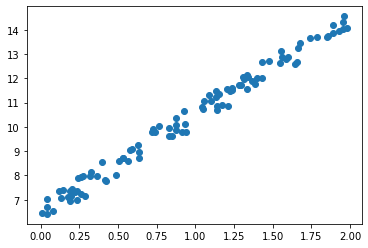

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
x=2*np.random.rand(100,1)
y=6+4*x+np.random.rand(100,1)

plt.scatter(x,y);

In [2]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N
    return cost

In [3]:
def get_weight_updates(w1,w0,x,y,learning_rate=0.01):
    N=len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(x, w1.T) + w0
    diff = y-y_pred
    w0_factor = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(x.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factor.T, diff))
    
    return w1_update, w0_update

In [4]:
def gradient_descent_steps(x,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,x,y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
    return w1, w0

In [5]:
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(x,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*x+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.028 w0:6.490
Gradient Descent Total Cost:0.0775


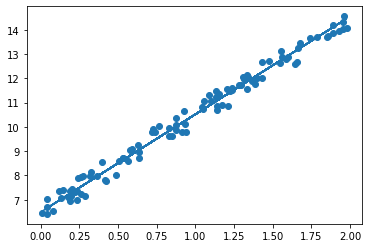

In [6]:
plt.scatter(x,y)
plt.plot(x, y_pred);

In [7]:
def stochastic_gradient_descent_steps(x,y,batch_size=10, iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(x.shape[0])
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1,w0,x,y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(x,y,batch_size=10, iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*x+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.49
Gradient Descent Total Cost:0.0775


# 04. Boston Home Price Prediction Using LinearRegression

### * LinearRegression Class - Ordinary Least Squares

In [9]:
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [10]:
from sklearn.linear_model import LinearRegression
#lm = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

### * Regression Evaluation Index

### * Boston Home Price Prediction

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston=load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['Price']=boston.target
print('Boston Dataset Size:', bostonDF.shape)
bostonDF.head()

Boston Dataset Size: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


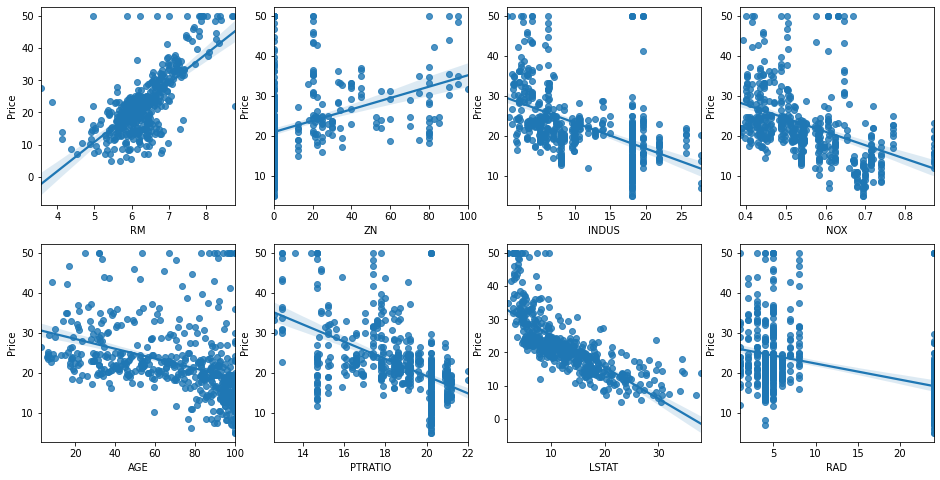

In [13]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features=['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x=feature, y='Price', data=bostonDF, ax=axs[row][col])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['Price']
x_data = bostonDF.drop(['Price'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance Score: 0.757


In [15]:
print('Intercept Value:', lr.intercept_)
print('Coefficients Value:', np.round(lr.coef_,1))

Intercept Value: 40.995595172165
Coefficients Value: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['Price']
x_data = bostonDF.drop(['Price'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('Each 5 folds of Negative MSE scores:', np.round(neg_mse_scores, 2))
print('Each 5 folds of RMSE scores:', np.round(rmse_scores, 2))
print('RMSE Average of 5 folds: {0:.3f}'.format(avg_rmse))

Each 5 folds of Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
Each 5 folds of RMSE scores: [3.53 5.1  5.75 8.99 5.77]
RMSE Average of 5 folds: 5.829


# 05. Polynomial Regression & Overfitting, Underfitting

### * Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x=np.arange(4).reshape(2,2)
print('Linear mononomial coefficient feature:\n', x)

poly=PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr=poly.transform(x)
print('Quadratic polynomial coefficient feature:\n', poly_ftr)

Linear mononomial coefficient feature:
 [[0 1]
 [2 3]]
Quadratic polynomial coefficient feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [19]:
def polynomial_func(x):
    y = 1+2*x[:,0]+3*x[:,0]**2+4*x[:,1]**3
    return y

x = np.arange(4).reshape(2,2)
print('Linear mononomial coefficient feature:\n', x)
y = polynomial_func(x)
print('Cubic polynomial decision value:\n', y)

Linear mononomial coefficient feature:
 [[0 1]
 [2 3]]
Cubic polynomial decision value:
 [  5 125]


In [20]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print('Cubic polynomial coefficient feature:\n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial Regression Coefficient:\n', np.round(model.coef_,2))
print('Polynomial Regression Shape:', model.coef_.shape)

Cubic polynomial coefficient feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial Regression Coefficient:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial Regression Shape: (10,)


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(x):
    y = 1+2*x[:,0]+3*x[:,0]**2+4*x[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])

x = np.arange(4).reshape(2,2)
y = polynomial_func(x)

model = model.fit(x, y)

print('Polynomial Regression Coefficient:\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial Regression Coefficient:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### * Overfitting & Underfitting (Using Polynomial Regression)

In [22]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

def true_fun(x):
    return np.cos(1.5* np.pi *x)

np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.rand(n_samples) *0.1


Degree 1 of coefficient is [-1.52].
Degree 1 of MSE is 0.3855980524675213.

Degree 4 of coefficient is [  1.74 -22.98  31.58 -11.24].
Degree 4 of MSE is 0.0057193082631229.

Degree 15 of coefficient is [ 1.20140000e+02 -3.59875000e+03  5.21453600e+04 -4.14484410e+05
  1.80874277e+06 -3.38019792e+06 -6.02587636e+06  5.58415801e+07
 -1.69822710e+08  3.08623770e+08 -3.68960417e+08  2.93843277e+08
 -1.50694444e+08  4.51471219e+07 -6.01502853e+06].
Degree 15 of MSE is 43057116.95752199.


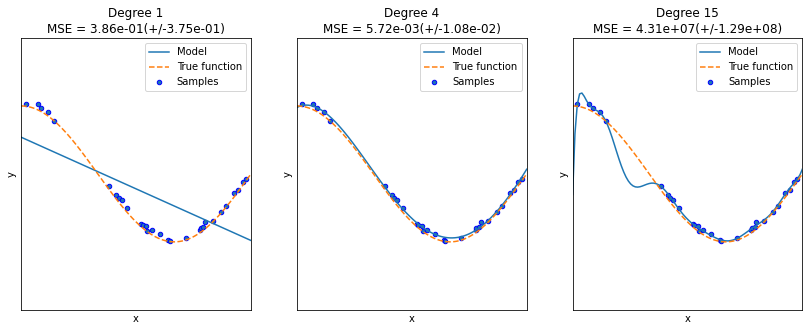

In [23]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),('linear_regression', linear_regression)])
    pipeline.fit(x.reshape(-1,1), y)
    
    scores = cross_val_score(pipeline, x.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} of coefficient is {1}.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} of MSE is {1}.'.format(degrees[i], -1*np.mean(scores)))
    
    x_test = np.linspace(0,1,100)
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label='Model')
    plt.plot(x_test, true_fun(x_test), '--', label='True function')
    plt.scatter(x, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show;

### * Bias-Variance Trade off

편향과 분산은 반비례 관계

편향이 너무 높으면 전제 오류값이 높다 / 편향과 분산을 적절하게 조절 필요(트레이드오프)
-> 골디락스(오류값이 가장 작은 지점) = 오류 cost 값이 최대로 낮아지는 모델

# 06. Regularization Linear Model - Ridge/Lasso/Elastic Net

### * Regularization Linear Model Outline
비용함수 목표 = $ Min(RSS(W)+alpha*|W|^2_2) $

alpha를 조정(페널티 부여): 규제
- L2 규제: 릿지 회귀 // W의 제곱에 대해 페널티 부여
- L1 규제: 라쏘 회귀 // W의 절대값에 대해 페널티 부여

### * Ridge Regression

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_mse=np.mean(rmse_scores)

print('5 folds of individual Negative MSE Scores:', np.round(neg_mse_scores, 3))
print('5 folds of individual RMSE Scores:', np.round(rmse_scores, 3))
print('5 folds of RMSE:', np.round(avg_mse, 3))

5 folds of individual Negative MSE Scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds of individual RMSE Scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds of RMSE: 5.518


In [25]:
alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_mse=np.mean(rmse_scores)
    
    print('When alpha = {0}\n 5 folds of RMSE = {1:.3f}\n'.format(alpha, avg_mse))

When alpha = 0
 5 folds of RMSE = 5.829

When alpha = 0.1
 5 folds of RMSE = 5.788

When alpha = 1
 5 folds of RMSE = 5.653

When alpha = 10
 5 folds of RMSE = 5.518

When alpha = 100
 5 folds of RMSE = 5.330



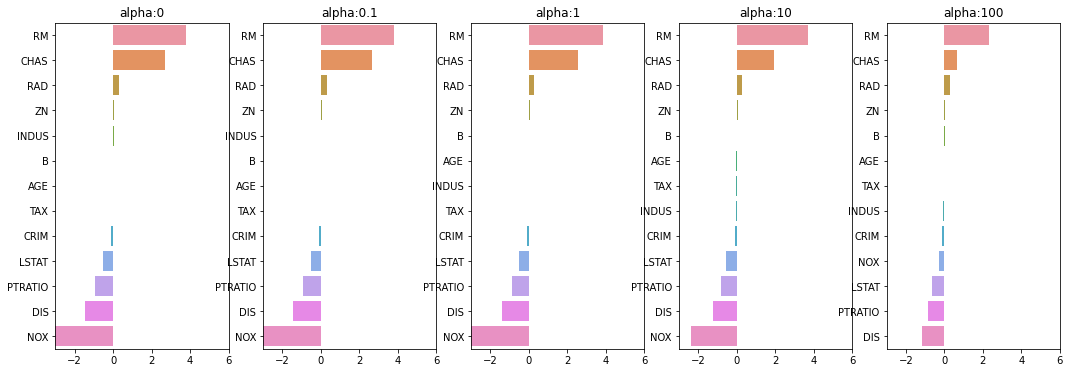

In [26]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show();

In [27]:
ridge_alphas=[0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### * Lasso Regression

In [28]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, x_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df=pd.DataFrame()
    if verbose : print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge':model = Ridge(alpha=param)
        elif model_name == 'Lasso':model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        rmse_scores = np.sqrt(-1*neg_mse_scores)
        avg_mse=np.mean(rmse_scores)
        print('When alpha = {0}\n 5 folds of RMSE = {1:.3f}\n'.format(param, avg_mse))
        
        model.fit(x_data, y_target)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=x_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df

In [29]:
lasso_alphas=[0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_data_n=x_data, y_target_n=y_target)

####### Lasso #######
When alpha = 0.07
 5 folds of RMSE = 5.612

When alpha = 0.1
 5 folds of RMSE = 5.615

When alpha = 0.5
 5 folds of RMSE = 5.669

When alpha = 1
 5 folds of RMSE = 5.776

When alpha = 3
 5 folds of RMSE = 6.189



In [30]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [31]:
elastic_alphas=[0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, x_data_n=x_data, y_target_n=y_target)

####### ElasticNet #######
When alpha = 0.07
 5 folds of RMSE = 5.542

When alpha = 0.1
 5 folds of RMSE = 5.526

When alpha = 0.5
 5 folds of RMSE = 5.467

When alpha = 1
 5 folds of RMSE = 5.597

When alpha = 3
 5 folds of RMSE = 6.068



In [32]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [34]:
alphas=[0.1,1,10,100]
scale_methods = [(None,None), ('Standard',None), ('Standard',2), ('MinMax',None), ('MinMax',2), ('Log',None)]

for scale_method in scale_methods:
    x_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=x_data)
    print('\n## Transformation Type: {0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge',params=alphas, x_data_n=x_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


## Transformation Type: None, Polynomial Degree: None
When alpha = 0.1
 5 folds of RMSE = 5.788

When alpha = 1
 5 folds of RMSE = 5.653

When alpha = 10
 5 folds of RMSE = 5.518

When alpha = 100
 5 folds of RMSE = 5.330


## Transformation Type: Standard, Polynomial Degree: None
When alpha = 0.1
 5 folds of RMSE = 5.826

When alpha = 1
 5 folds of RMSE = 5.803

When alpha = 10
 5 folds of RMSE = 5.637

When alpha = 100
 5 folds of RMSE = 5.421


## Transformation Type: Standard, Polynomial Degree: 2
When alpha = 0.1
 5 folds of RMSE = 8.827

When alpha = 1
 5 folds of RMSE = 6.871

When alpha = 10
 5 folds of RMSE = 5.485

When alpha = 100
 5 folds of RMSE = 4.634


## Transformation Type: MinMax, Polynomial Degree: None
When alpha = 0.1
 5 folds of RMSE = 5.764

When alpha = 1
 5 folds of RMSE = 5.465

When alpha = 10
 5 folds of RMSE = 5.754

When alpha = 100
 5 folds of RMSE = 7.635


## Transformation Type: MinMax, Polynomial Degree: 2
When alpha = 0.1
 5 folds of RMSE = 5.298



# 07. Logistic Regression

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
lr_preds=lr_clf.predict(x_test)

print('Accuracy: {0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('ROC_AUC: {0:.3f}'.format(roc_auc_score(y_test, lr_preds)))

Accuracy: 0.982
ROC_AUC: 0.979


In [38]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2','l1'],
         'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('Best Parameter: {0}, Best Score: {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

Best Parameter: {'C': 0.1, 'penalty': 'l2'}, Best Score: 0.979


# 08. Regression Tree

In [39]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['Price'] = boston.target
y_target = bostonDF['Price']
x_data = bostonDF.drop(['Price'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds of individual Negative MSE Scores:', np.round(neg_mse_scores, 2))
print('5 folds of individual RMSE Scores:', np.round(rmse_scores, 2))
print('5 folds of RMSE: {0:.3f}'.format(avg_rmse))

5 folds of individual Negative MSE Scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 folds of individual RMSE Scores: [2.81 3.63 4.54 6.8  4.34]
5 folds of RMSE: 4.423


In [40]:
def get_model_cv_prediction(model, x_data, y_target):
    neg_mse_scores = cross_val_score(model, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__, '#####')
    print('5 folds of RMSE: {0:.3f}'.format(avg_rmse))

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model, x_data, y_target)

##### DecisionTreeRegressor #####
5 folds of RMSE: 5.978
##### RandomForestRegressor #####
5 folds of RMSE: 4.423
##### GradientBoostingRegressor #####
5 folds of RMSE: 4.269
##### XGBRegressor #####
5 folds of RMSE: 4.251
##### LGBMRegressor #####
5 folds of RMSE: 4.646


<AxesSubplot:>

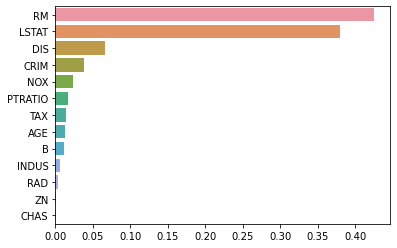

In [42]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


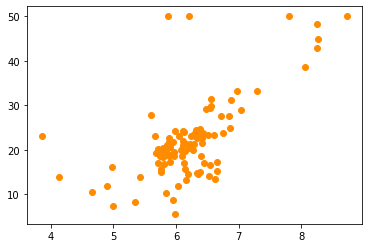

In [43]:
bostonDF_sample = bostonDF[['RM','Price']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.Price, c='darkorange');

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

x_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

x_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['Price'].values.reshape(-1,1)

lr_reg.fit(x_feature, y_target)
dt_reg2.fit(x_feature, y_target)
dt_reg7.fit(x_feature, y_target)

pred_lr = lr_reg.predict(x_test)
pred_dt2 = dt_reg2.predict(x_test)
pred_dt7 = dt_reg7.predict(x_test)

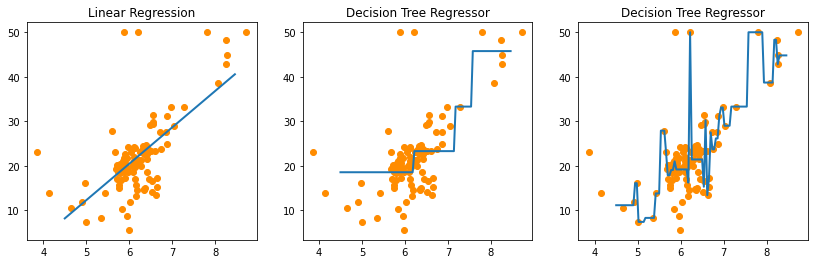

In [45]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.Price, c='darkorange')
ax1.plot(x_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regressor')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.Price, c='darkorange')
ax2.plot(x_test, pred_dt2, label='max_depth=2', linewidth=2)

ax3.set_title('Decision Tree Regressor')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.Price, c='darkorange')
ax3.plot(x_test, pred_dt7, label='max_depth=7', linewidth=2);

# 09. Bike rental demand forecast

### * 데이터 클렌징 및 가공

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df=pd.read_csv('./bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [47]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [48]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [49]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y - log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val=rmsle(y,pred)
    rmse_val=rmse(y,pred)
    mae_val=mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

### * 로그 변환, 피처 인코딩과 모델 학습/예측/평가

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
x_features = bike_df.drop(['count'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

evaluate_regr(y_test,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [52]:
def get_top_error_data(y_test, pred, n_tops=5):
    result_df=pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


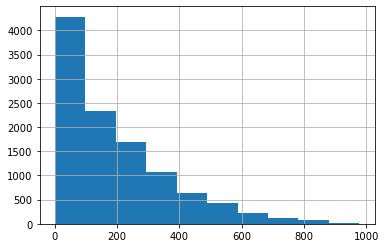

In [53]:
y_target.hist();

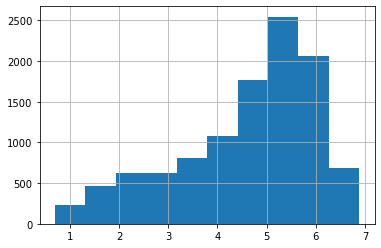

In [54]:
y_log_transform=np.log1p(y_target)
y_log_transform.hist();

In [55]:
y_target_log=np.log1p(y_target)

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

y_test_exp=np.expm1(y_test)
pred_exp=np.expm1(pred)

evaluate_regr(y_test_exp,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


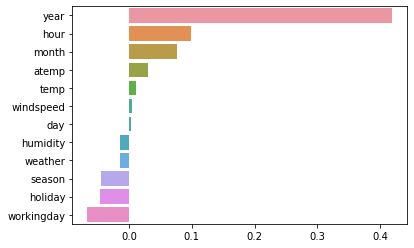

In [56]:
coef=pd.Series(lr_reg.coef_,index=x_features.columns)
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index);

In [57]:
x_features_ohe=pd.get_dummies(x_features, columns=['year','month','day','hour','holiday', 'workingday','season','weather'])

x_train, x_test, y_train, y_test = train_test_split(x_features_ohe, y_target_log, test_size=0.3, random_state=0)

def get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=False):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
    
lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


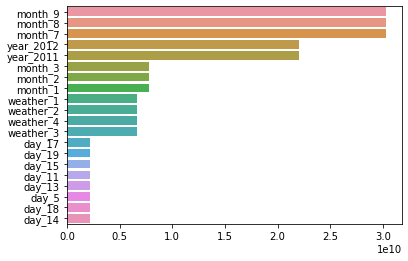

In [58]:
coef=pd.Series(lr_reg.coef_, index=x_features_ohe.columns)
coef_sort=coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index);

In [59]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gb_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgb_reg = LGBMRegressor(n_estimators=500)

models = [rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_predict(model, x_train.values, x_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.392, MAE: 31.250
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.345, MAE: 32.744
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


# 10. Kaggle Home Prices: Advanced Regression Techniques

### * 데이터 사전 처리

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

house_df_org=pd.read_csv('./house_price.csv')
house_df=house_df_org.copy()
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
print('Shape of dataset:', house_df.shape)
print('\nType of total feature:\n', house_df.dtypes.value_counts())
isnull_series=house_df.isnull().sum()
print('\nNull Columns & Counts:\n', isnull_series[isnull_series > 0].sort_values(ascending=False))

Shape of dataset: (1460, 81)

Type of total feature:
 object     43
int64      35
float64     3
dtype: int64

Null Columns & Counts:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


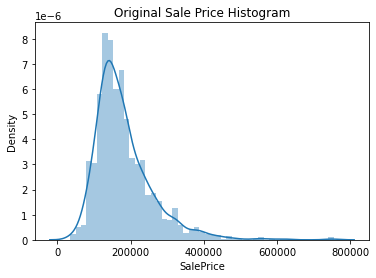

In [62]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice']);

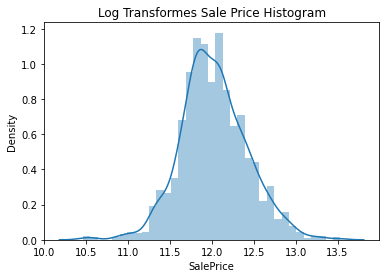

In [63]:
plt.title('Log Transformes Sale Price Histogram')
log_SalePrice=np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice);

In [64]:
original_SalePrice=house_df['SalePrice']
house_df['SalePrice']=np.log1p(house_df['SalePrice'])

house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)
house_df.fillna(house_df.mean(), inplace=True)

null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('Type of Null Feature:\n', house_df.dtypes[null_column_count.index])

Type of Null Feature:
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [65]:
print('Data shape before OHE:',house_df.shape)
house_df_ohe=pd.get_dummies(house_df)
print('Data shape after OHE:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('Type of Null Feature:\n', house_df_ohe.dtypes[null_column_count.index])

Data shape before OHE: (1460, 75)
Data shape after OHE: (1460, 271)
Type of Null Feature:
 Series([], dtype: object)


### * 선형 회귀 모델 학습/예측/평가

In [66]:
def get_rmse(model):
    pred=model.predict(x_test)
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mse)
    print(model.__class__.__name__, 'Log Transformed RMSE:', np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
    return rmses

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

y_target=house_df_ohe['SalePrice']
x_features=house_df_ohe.drop('SalePrice', axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2, random_state=156)

lr_reg=LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg=Ridge()
ridge_reg.fit(x_train, y_train)
lasso_reg=Lasso()
lasso_reg.fit(x_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression Log Transformed RMSE: 0.132
Ridge Log Transformed RMSE: 0.128
Lasso Log Transformed RMSE: 0.176


[0.13189576579154275, 0.12750846334053004, 0.17628250556471411]

In [68]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=x_features.columns)
    coef_high=coef.sort_values(ascending=False).head(n)
    coef_low=coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

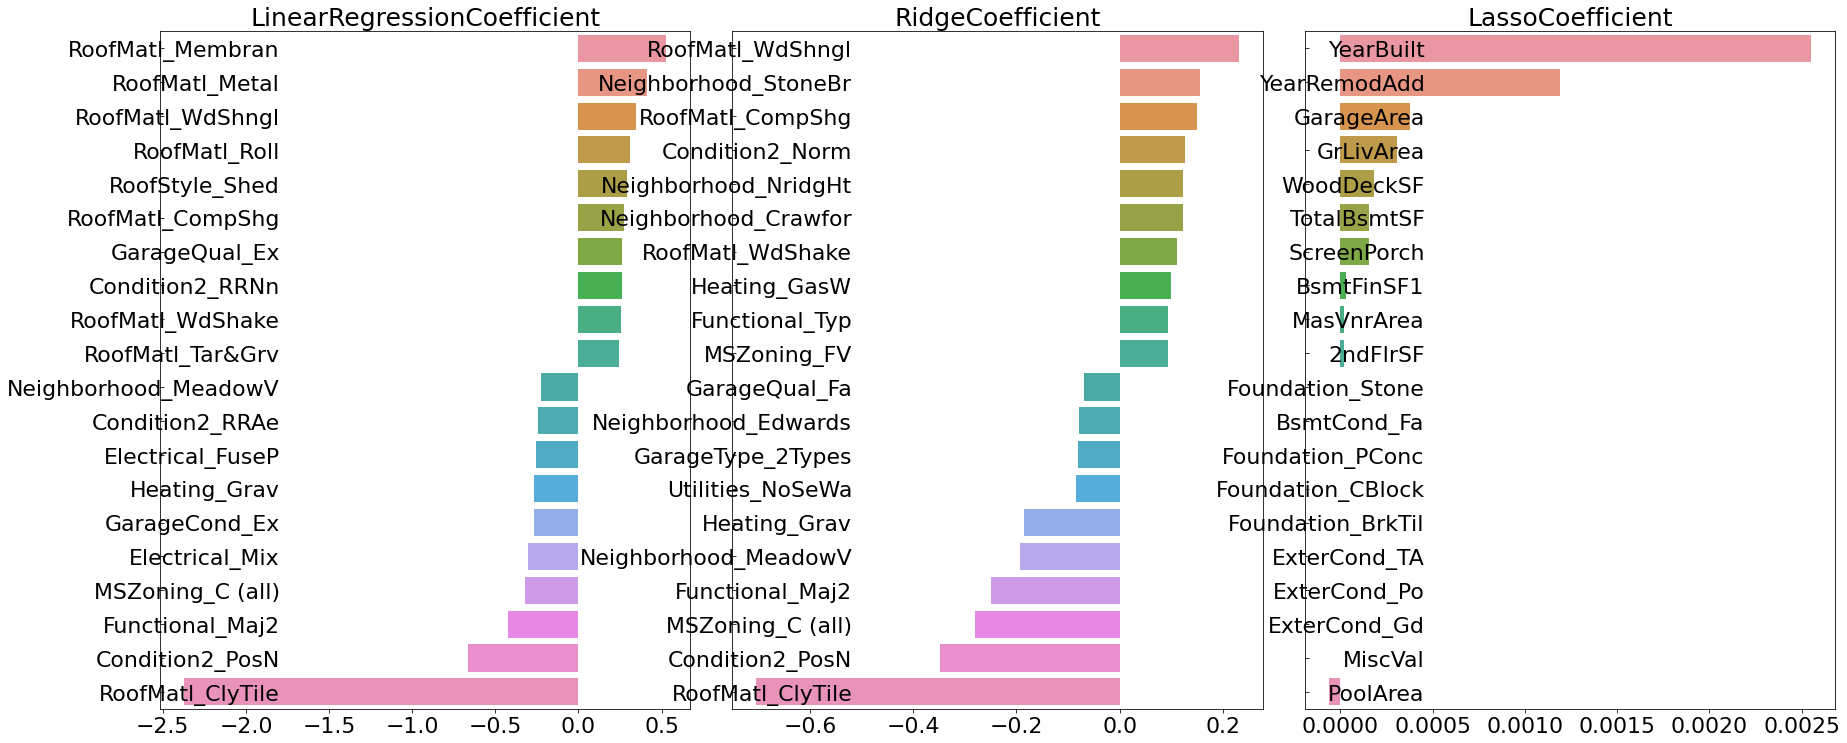

In [69]:
def visualize_coefficient(models):
    fig, axs =plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    for i_num, model in enumerate(models):
        coef_high, coef_low=get_top_bottom_coef(model)
        coef_concat=pd.concat([coef_high, coef_low])
        axs[i_num].set_title(model.__class__.__name__+'Coefficient', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [70]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list=np.sqrt(-cross_val_score(model, x_features, y_target, scoring='neg_mean_squared_error', cv=5))
        rmse_avg=np.mean(rmse_list)
        print('\n{0} CV RMSE value list:{1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('{0} CV Mean RMSE value: {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))

models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE value list:[0.135 0.165 0.168 0.111 0.198]
LinearRegression CV Mean RMSE value: 0.155

Ridge CV RMSE value list:[0.117 0.154 0.142 0.117 0.189]
Ridge CV Mean RMSE value: 0.144

Lasso CV RMSE value list:[0.161 0.204 0.177 0.181 0.265]
Lasso CV Mean RMSE value: 0.198


In [71]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model=GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(x_features, y_target)
    rmse=np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV // Best Mean RMSE value: {1}, Best alpha: {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))
    
ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV // Best Mean RMSE value: 0.1418, Best alpha: {'alpha': 12}
Lasso 5 CV // Best Mean RMSE value: 0.142, Best alpha: {'alpha': 0.001}


LinearRegression Log Transformed RMSE: 0.132
Ridge Log Transformed RMSE: 0.124
Lasso Log Transformed RMSE: 0.12


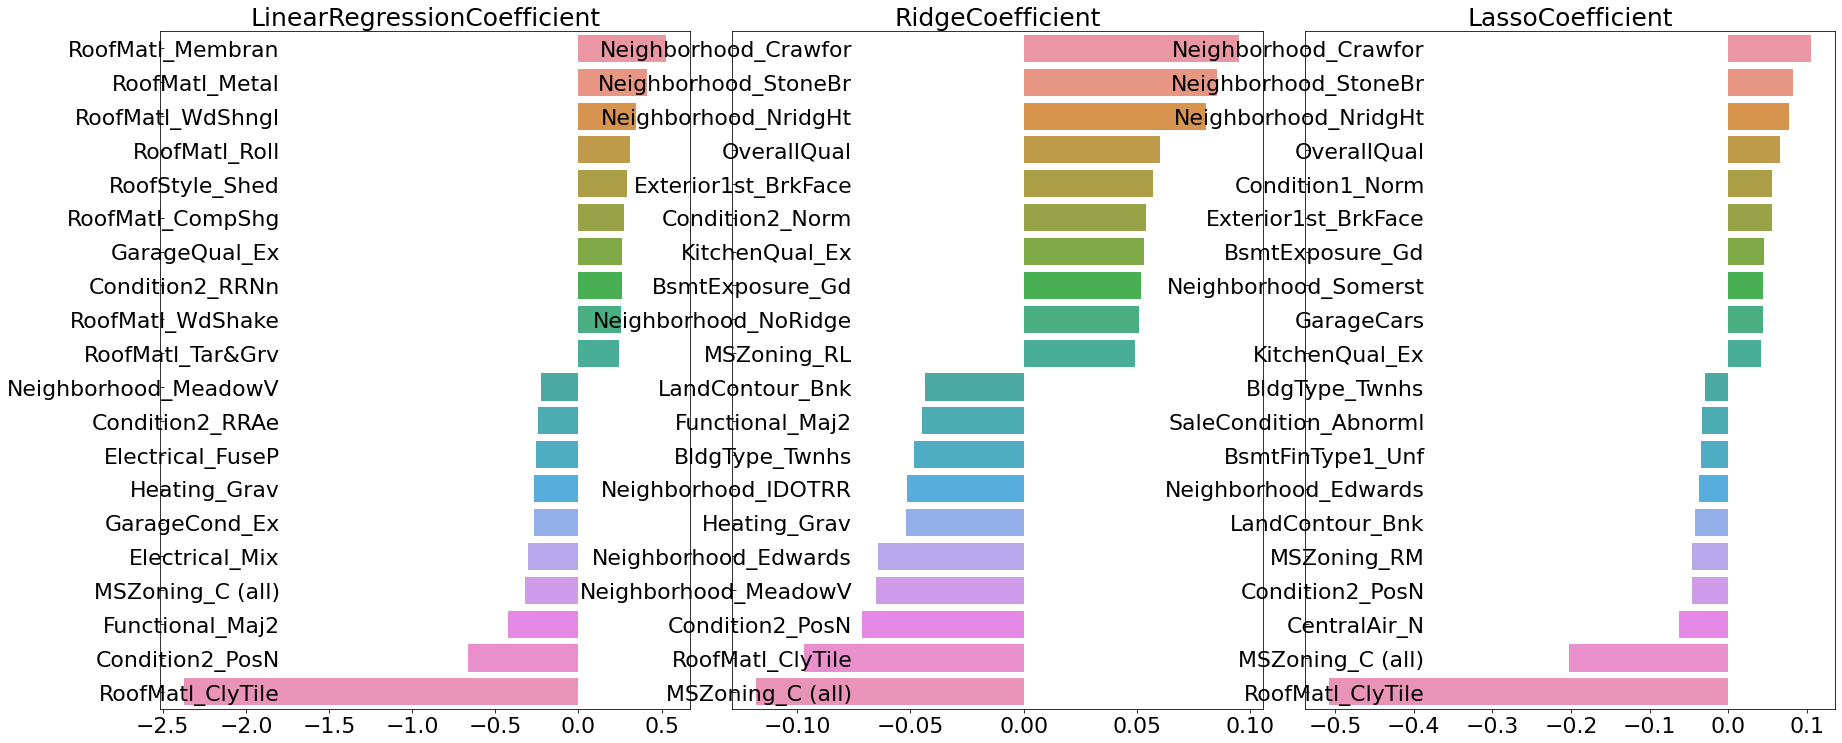

In [72]:
lr_reg=LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg=Ridge(alpha=12)
ridge_reg.fit(x_train, y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [73]:
from scipy.stats import skew

features_index = house_df.dtypes[house_df.dtypes != 'object'].index
skew_features = house_df[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [74]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

Ridge 5 CV // Best Mean RMSE value: 0.1275, Best alpha: {'alpha': 10}
Lasso 5 CV // Best Mean RMSE value: 0.1252, Best alpha: {'alpha': 0.001}


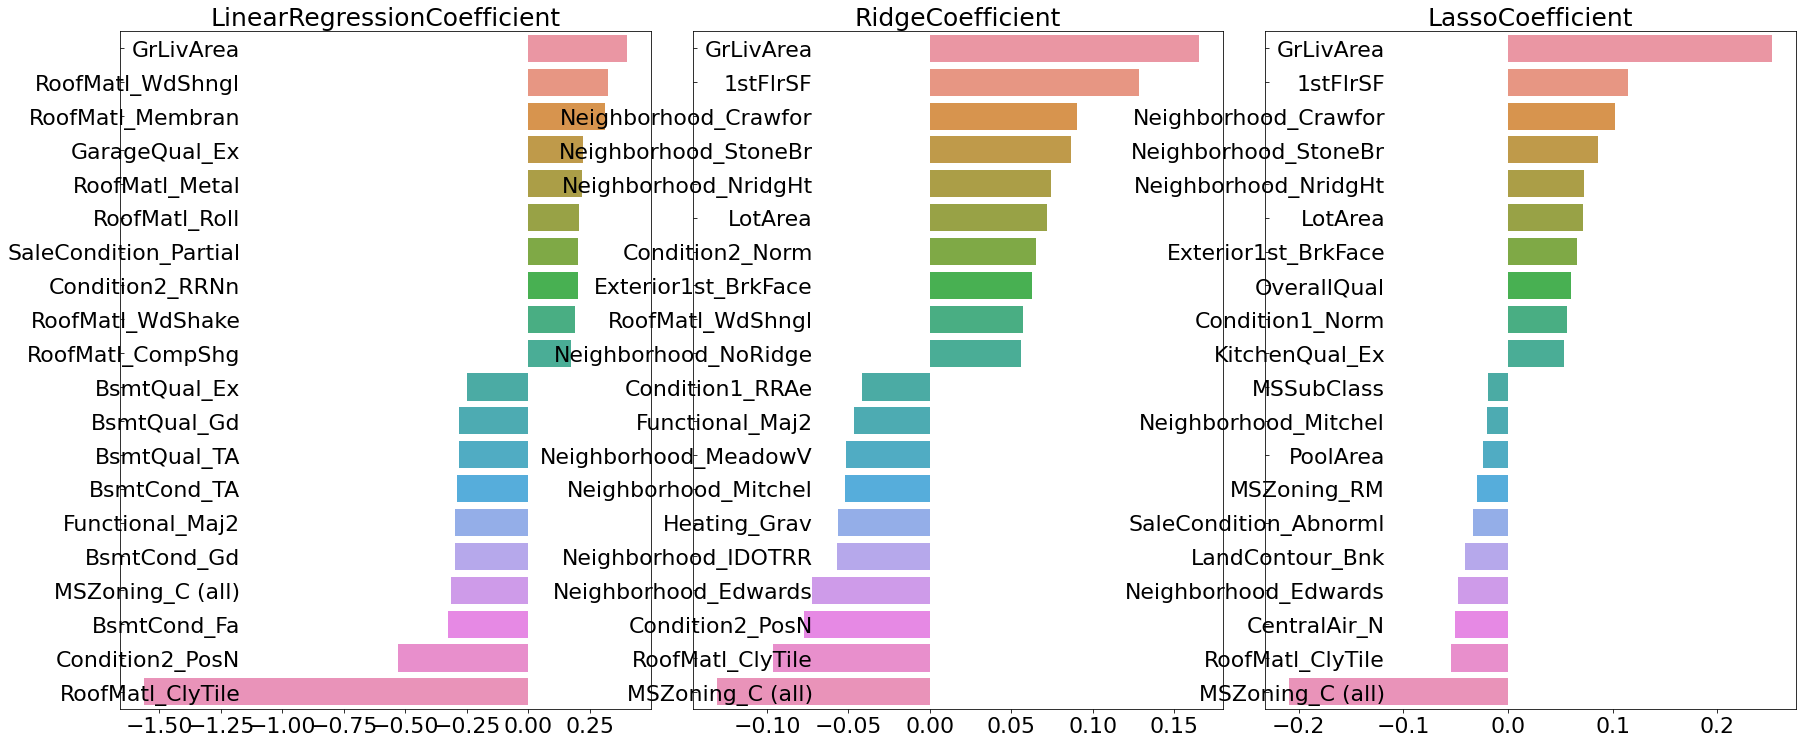

In [75]:
house_df_ohe = pd.get_dummies(house_df)
y_target=house_df_ohe['SalePrice']
x_features=house_df_ohe.drop('SalePrice', axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2, random_state=156)

ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

lr_reg=LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg=Ridge(alpha=10)
ridge_reg.fit(x_train, y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

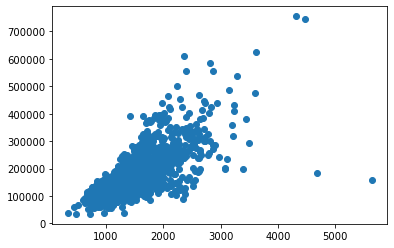

In [76]:
plt.scatter(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])
plt.ylabel=('SalePrice')
plt.xlabel=('GrLivArea')
plt.show()

In [77]:
cond1=house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2=house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index=house_df_ohe[cond1 & cond2].index

print('Outlier Record index:', outlier_index.values)
print('Before deleting outlier house_df_ohe Shape:', house_df_ohe.shape)

house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('After deleting outlier house_df_ohe Shape:', house_df_ohe.shape)

Outlier Record index: [ 523 1298]
Before deleting outlier house_df_ohe Shape: (1460, 271)
After deleting outlier house_df_ohe Shape: (1458, 271)


In [78]:
y_target=house_df_ohe['SalePrice']
x_features=house_df_ohe.drop('SalePrice', axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2, random_state=156)

ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV // Best Mean RMSE value: 0.1125, Best alpha: {'alpha': 8}
Lasso 5 CV // Best Mean RMSE value: 0.1122, Best alpha: {'alpha': 0.001}


LinearRegression Log Transformed RMSE: 0.129
Ridge Log Transformed RMSE: 0.103
Lasso Log Transformed RMSE: 0.1


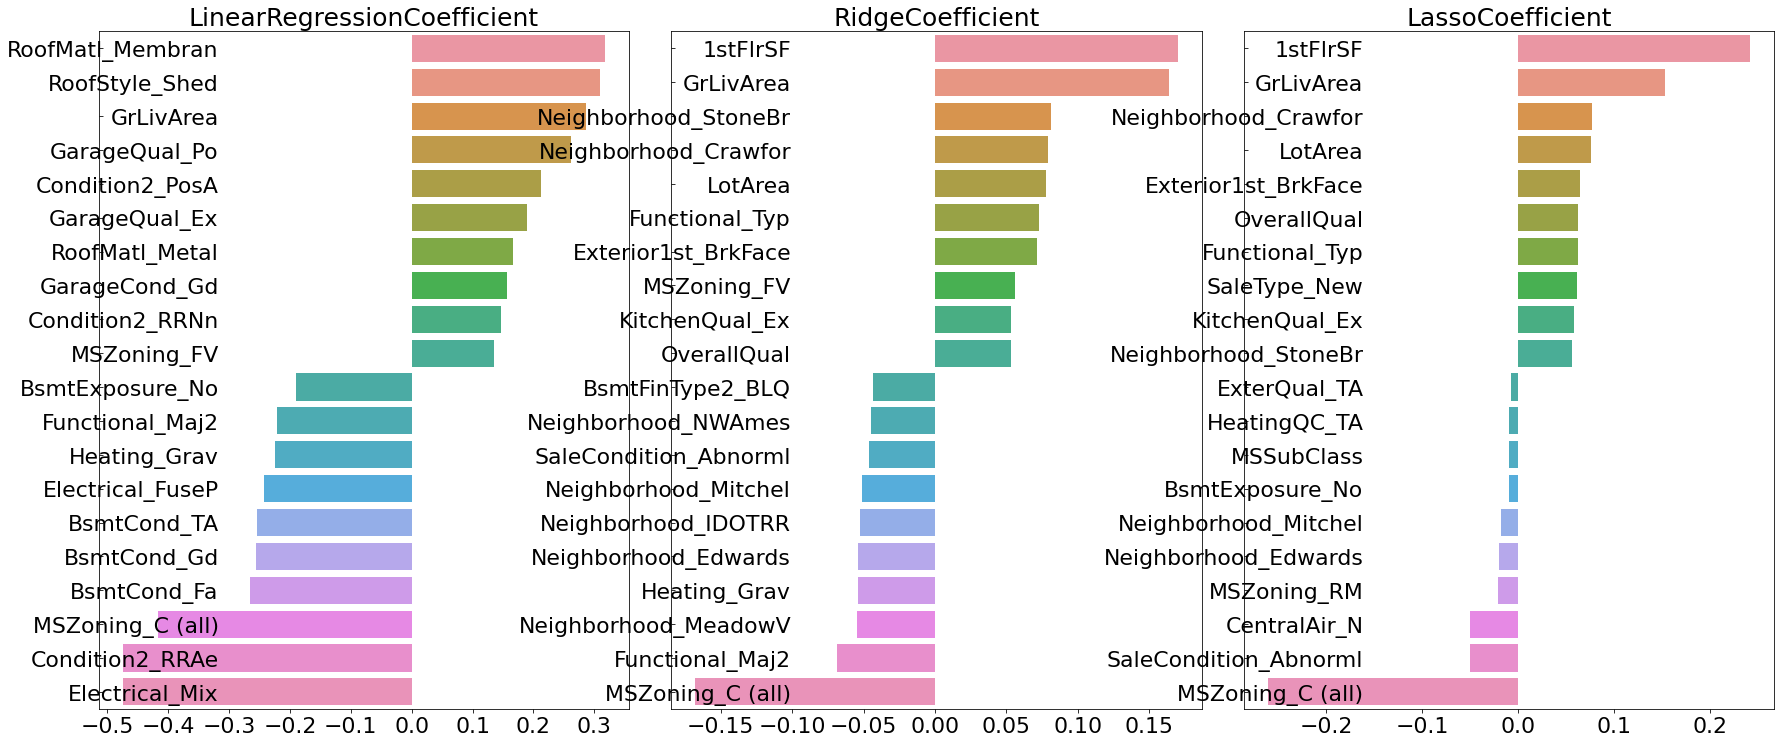

In [79]:
lr_reg=LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg=Ridge(alpha=8)
ridge_reg.fit(x_train, y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### * 회귀 트리 모델 학습/예측/평가

In [80]:
from xgboost import XGBRegressor

xgb_params={'n_estimators':[1000]}
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV // Best Mean RMSE value: 0.1197, Best alpha: {'n_estimators': 1000}


In [81]:
from lightgbm import LGBMRegressor

lgb_params={'n_estimators':[1000]}
lgb_reg=LGBMRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.4, subsample=0.6, num_leaves=4, reg_lambda=10, n_jobs=-1)
print_best_params(lgb_reg, lgb_params)

LGBMRegressor 5 CV // Best Mean RMSE value: 0.1163, Best alpha: {'n_estimators': 1000}


### * 회귀모델의 예측 결과 혼합을 통한 최종 예측

In [87]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value=preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse=np.sqrt(mse)
        print('{0} Model RMSE: {1}'.format(key, rmse))
    
ridge_reg=Ridge(alpha=8)
ridge_reg.fit(x_train, y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

ridge_pred=ridge_reg.predict(x_test)
lasso_pred=lasso_reg.predict(x_test)

pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'Final blending': pred, 'Ridge': ridge_pred, 'Lasso': lasso_pred}

get_rmse_pred(preds)

Final blending Model RMSE: 0.1000793088447053
Ridge Model RMSE: 0.10345177546603274
Lasso Model RMSE: 0.10024170460890047


In [88]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgb_reg=LGBMRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.4, subsample=0.6, num_leaves=4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(x_train, y_train)
lgb_reg.fit(x_train, y_train)
xgb_pred=xgb_reg.predict(x_test)
lgb_pred=lgb_reg.predict(x_test)

pred = 0.5*xgb_pred + 0.5*lgb_pred
preds = {'Final blending': pred, 'XGB': xgb_pred, 'LGBM': lgb_pred}

get_rmse_pred(preds)

Final blending Model RMSE: 0.10277689340617208
XGB Model RMSE: 0.10946473825650248
LGBM Model RMSE: 0.10382510019327311


### * 스태킹 앙상블 모델을 통한 회귀 예측